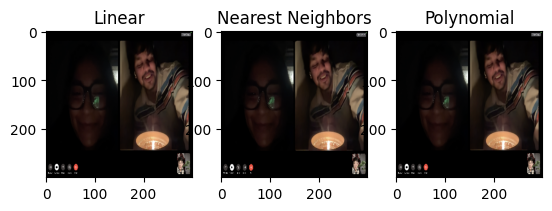

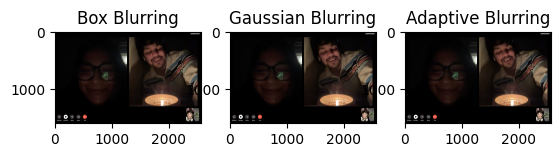

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/Screenshot 2024-12-14 at 1.10.08 AM.png')

resized_linear = cv2.resize(image, (300, 300), interpolation=cv2.INTER_LINEAR)
resized_nearest = cv2.resize(image, (300, 300), interpolation=cv2.INTER_NEAREST)
resized_polynomial = cv2.resize(image, (300, 300), interpolation=cv2.INTER_CUBIC)

# Display the resized images
plt.subplot(131), plt.imshow(cv2.cvtColor(resized_linear, cv2.COLOR_BGR2RGB)), plt.title('Linear')
plt.subplot(132), plt.imshow(cv2.cvtColor(resized_nearest, cv2.COLOR_BGR2RGB)), plt.title('Nearest Neighbors')
plt.subplot(133), plt.imshow(cv2.cvtColor(resized_polynomial, cv2.COLOR_BGR2RGB)), plt.title('Polynomial')
plt.show()

# Image Blurring
box_blur = cv2.blur(image, (5, 5))
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
adaptive_blur = cv2.bilateralFilter(image, 9, 75, 75)

plt.subplot(131), plt.imshow(cv2.cvtColor(box_blur, cv2.COLOR_BGR2RGB)), plt.title('Box Blurring')
plt.subplot(132), plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB)), plt.title('Gaussian Blurring')
plt.subplot(133), plt.imshow(cv2.cvtColor(adaptive_blur, cv2.COLOR_BGR2RGB)), plt.title('Adaptive Blurring')
plt.show()

In [1]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the MNIST dataset from TensorFlow
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train.reshape((X_train.shape[0], 28 * 28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28 * 28)).astype('float32')

X_train /= 255
X_test /= 255

X_train_small, X_val, y_train_small, y_val = train_test_split(X_train[:10000], y_train[:10000], test_size=0.2, random_state=42)

pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_small)
X_val_pca = pca.transform(X_val)

# Apply Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train_pca, y_train_small)
y_pred_nb = model_nb.predict(X_val_pca)

# Apply Support Vector Machine (SVM) with PCA-transformed data
model_svm = SVC(probability=True, kernel='linear', cache_size=7000)
model_svm.fit(X_train_pca, y_train_small)
y_pred_svm = model_svm.predict(X_val_pca)

print("Naive Bayes Results:")
print("Accuracy:", accuracy_score(y_val, y_pred_nb))
print("Precision:", precision_score(y_val, y_pred_nb, average='weighted'))
print("Recall:", recall_score(y_val, y_pred_nb, average='weighted'))
print("F1-Score:", f1_score(y_val, y_pred_nb, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_nb))

print("SVM Results:")
print("Accuracy:", accuracy_score(y_val, y_pred_svm))
print("Precision:", precision_score(y_val, y_pred_svm, average='weighted'))
print("Recall:", recall_score(y_val, y_pred_svm, average='weighted'))
print("F1-Score:", f1_score(y_val, y_pred_svm, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_svm))

Naive Bayes Results:
Accuracy: 0.879
Precision: 0.8821602347580088
Recall: 0.879
F1-Score: 0.8797544984335158
Confusion Matrix:
 [[197   0   4   0   0   4   1   0   1   0]
 [  0 201   3   1   0   6   0   0   5   0]
 [  2   0 176   9   2   1   5   1   8   0]
 [  3   0   6 165   0   7   0   2   6   3]
 [  0   0  11   0 178   0   6   0   3  13]
 [  1   0   5  18   0 144   1   2   4   1]
 [  2   0   7   1   1   6 203   0   0   0]
 [  1   1   4   0   7   0   0 196   2   5]
 [  0   0   5   9   1   2   0   0 147   2]
 [  1   1   6   4  12   5   0   8   4 151]]
SVM Results:
Accuracy: 0.9335
Precision: 0.9338608528925002
Recall: 0.9335
F1-Score: 0.9333459333030864
Confusion Matrix:
 [[205   0   0   0   0   1   1   0   0   0]
 [  0 213   2   0   0   0   0   0   1   0]
 [  3   1 184   4   3   2   0   0   5   2]
 [  0   4   8 170   0   4   0   3   2   1]
 [  1   0   1   0 203   0   1   0   1   4]
 [  2   3   5  12   1 151   0   0   1   1]
 [  2   0   5   0   0   6 207   0   0   0]
 [  1   0   0   